In [16]:
import os
import numpy as np
import pandas as pd

from dask_searchcv import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import MultiTaskElasticNet

from sklearn.metrics import f1_score, make_scorer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Set constants
alphas= [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]
l1_mixing = [0.1, 0.15, 0.18, 0.2, 0.5, 1]

In [4]:
file = os.path.join('data', 'compass_x_train.tsv.gz')
x_df = pd.read_table(file, index_col=0).T
print(x_df.shape)
x_df.head(2)

(706, 8000)


GENE_ID,ENSG00000000419,ENSG00000001036,ENSG00000001167,ENSG00000001461,ENSG00000001561,ENSG00000001629,ENSG00000001630,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000273015,ENSG00000273018,ENSG00000273047,ENSG00000273061,ENSG00000273148,ENSG00000273173,ENSG00000273271,ENSG00000273338,ENSG00000273344,ENSG00000273472
MMRF_1021_1_BM,0.002039,0.001428,0.000656,0.001638,0.001126,0.000682,0.002040,0.000836,0.001092,0.003595,...,0.000773,0.000953,0.001499,0.000390,0.000284,0.007063,0.000252,0.005463,0.000286,0.000517
MMRF_1024_2_BM,0.001164,0.000949,0.000828,0.000658,0.000866,0.000776,0.001559,0.000898,0.001600,0.001572,...,0.001248,0.006047,0.000600,0.000672,0.000420,0.004150,0.000222,0.001641,0.000427,0.000931


In [5]:
file = os.path.join('data', 'compass_y_train_multiclass.tsv')
y_df = pd.read_table(file, index_col=0)
print(y_df.shape)
y_df.head(2)

(706, 2)


,KRAS_status,NRAS_status
MMRF_1021_1_BM,1,0
MMRF_1024_2_BM,0,0


In [17]:
#weighted_f1 = make_scorer(f1_score, average='weighted')

In [18]:
clf_parameters = {'classify__alpha': alphas,
                  'classify__l1_ratio': l1_mixing,
                  'classify__max_iter': [200]}

In [22]:
estimator = Pipeline(
    steps=[('classify',
            MultiTaskElasticNet(random_state=123))]
)

cv_pipeline = GridSearchCV(estimator=estimator,
                           param_grid=clf_parameters,
                           n_jobs=-1,
                           cv=5)

In [23]:
cv_pipeline.fit(X=x_df, y=np.array(y_df))

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  ConvergenceWarning)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  ConvergenceWarning)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  ConvergenceWarning)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  Converge

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  ConvergenceWarning)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  ConvergenceWarning)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  ConvergenceWarning)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1778: ConvergenceWarning: Objective did not converge, you might want to increase the number of iterations
  Converge

GridSearchCV(cache_cv=True, cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('classify', MultiTaskElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
          max_iter=1000, normalize=False, random_state=123,
          selection='cyclic', tol=0.0001, warm_start=False))]),
       iid=True, n_jobs=-1,
       param_grid={'classify__max_iter': [200], 'classify__alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1], 'classify__l1_ratio': [0.1, 0.15, 0.18, 0.2, 0.5, 1]},
       refit=True, return_train_score='warn', scheduler=None, scoring=None)

In [24]:
cv_results = pd.concat([pd.DataFrame(cv_pipeline.cv_results_)
                          .drop('params', axis=1),
                        pd.DataFrame.from_records(cv_pipeline
                                                  .cv_results_['params'])],
                       axis=1)

/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in sklearn 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/greg/anaconda3/envs/multiple-myeloma-classifier/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in sklearn 0.21. If you need training sc

In [26]:
a = pd.DataFrame(cv_pipeline.best_estimator_.named_steps['classify'].coef_).T
#a.columns = ['wildtype', 'KRAS', 'NRAS']
a.index = x_df.columns
a.head()

,0,1
GENE_ID,,
ENSG00000000419,0.0,0.0
ENSG00000001036,0.0,0.0
ENSG00000001167,0.0,0.0
ENSG00000001461,0.0,0.0
ENSG00000001561,0.0,0.0


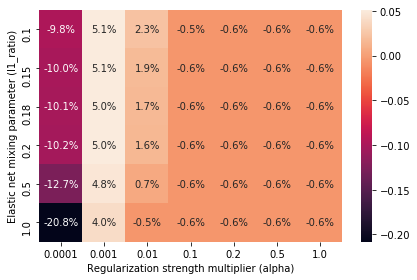

In [28]:
# Cross-validated performance heatmap
cv_score_mat = pd.pivot_table(cv_results, values='mean_test_score',
                              index='classify__l1_ratio',
                              columns='classify__alpha')
ax = sns.heatmap(cv_score_mat, annot=True, fmt='.1%')
ax.set_xlabel('Regularization strength multiplier (alpha)')
ax.set_ylabel('Elastic net mixing parameter (l1_ratio)')
plt.tight_layout()